In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(tf.__version__)

2.18.0


In [2]:
observations=1000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))
inputs = np.column_stack((xs, zs))
print(inputs.shape)

(1000, 2)


In [3]:
noise = np.random.uniform(-1, 1, (observations,1))
targets = 13*xs + 7*zs - 12 + noise
np.savez('TF_dataset', inputs=inputs, targets=targets)
print(targets.shape)

(1000, 1)


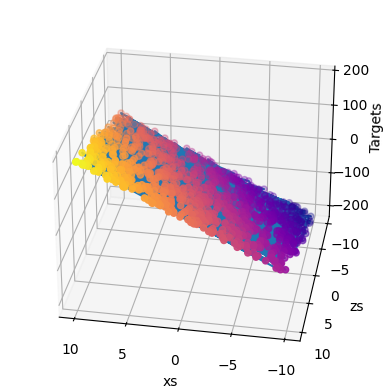

In [4]:
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
ax.scatter(xs, zs, targets, c=targets, cmap='plasma')
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()

In [9]:
init_range = 0.1
weigts = np.random.uniform(low=-init_range, high=init_range, size=(2,1))
biases = np.random.uniform(low=-init_range, high=init_range, size=1)
print(weigts,biases)

[[-0.09940397]
 [-0.00017667]] [-0.07844616]


In [10]:
targets = targets.reshape(observations,1)
eta = 0.05
for i in range (100):
  outputs = np.dot(inputs, weigts) + biases
  deltas = outputs - targets

  loss = np.sum(deltas ** 2) / 2 / observations
  print(loss)
  print(i)

  deltas_scaled = deltas / observations

  weigts = weigts - eta * np.dot(inputs.T, deltas_scaled)
  biases = biases - eta * np.sum(deltas_scaled)

3989.303135145026
0
2340.4695583564467
1
1409.3710148091232
2
863.5285477473673
3
536.7908897691652
4
338.8126836445782
5
217.84211704369596
6
143.3658876409897
7
97.118451745223
8
68.07985705858857
9
49.57351828433317
10
37.543962629402884
11
29.522918780646858
12
24.005028398544187
13
20.069798828454648
14
17.152330440257067
15
14.904155687393057
16
13.108726204369187
17
11.630062449214849
18
10.38153510408826
19
9.306870939030574
20
8.368583516051153
21
7.540914939335288
22
6.805519497108801
23
6.148814887022883
24
5.56034855128226
25
5.031782755155121
26
4.556257542943544
27
4.127985128822495
28
3.741986623061573
29
3.393916824861122
30
3.079943975234044
31
2.7966642260850447
32
2.5410384044392957
33
2.310343412590604
34
2.102133507271278
35
1.9142084733070883
36
1.7445867925920677
37
1.591482576618975
38
1.4532854436357387
39
1.3285427790461393
40
1.2159439802751388
41
1.1143063916750184
42
1.022562703493844
43
0.9397496350780665
44
0.8649977546481921
45
0.7975223112612214
46
0.73

In [11]:
print(weigts, biases)

[[13.00335809]
 [ 6.99708469]] [-11.91624968]


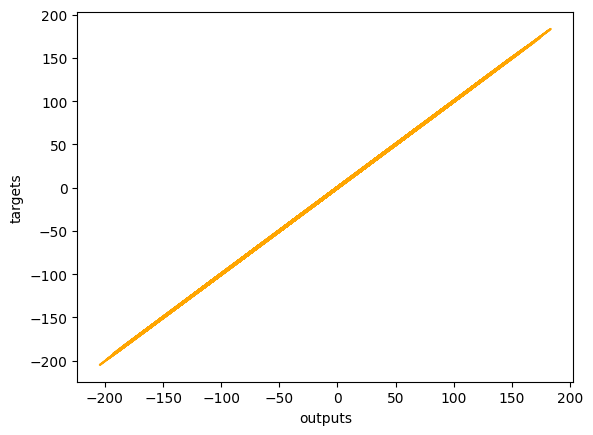

In [12]:
plt.plot(outputs, targets, color='orange')
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()